## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import shap


%matplotlib inline

## Load and Explore data

In [3]:
train = pd.read_csv(r"../data/train.csv")
train.columns = [col.strip().lower() for col in train.columns]
print(f"The shape of the train data: {train.shape}")
train.sample(3)

The shape of the train data: (170883, 32)


,id,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
143564,143564,85447.0,-9.172826,-10.806479,1.973156,3.257921,11.513596,-7.074627,-7.615961,0.290180,1.824359,1.189330,-1.275491,0.583789,-0.453333,-0.235497,0.067071,-0.252894,-0.192624,-0.768229,-0.180235,-1.846962,-0.599129,-0.386961,-1.894323,-0.135689,-0.153871,-0.338223,1.421463,-0.631871,7.99,0
59092,59092,48690.0,1.227018,0.259483,0.415773,0.920196,-0.081687,-0.243476,0.003272,-0.117104,0.086883,-0.076953,-0.907684,0.551968,1.284601,-0.025154,1.119060,0.572899,-0.913411,-0.042379,-0.065803,0.009428,-0.221273,-0.639741,-0.023460,-0.462853,0.437954,-0.577344,0.038435,0.032450,27.87,0
149625,149625,91596.0,1.928695,-0.357081,-0.216304,0.506385,-0.400063,0.246752,-0.847757,0.110168,2.449148,-0.390255,1.747794,-1.242582,1.876216,1.387964,-0.895150,0.192484,0.014966,0.880120,-0.219742,-0.211886,0.101056,0.730752,0.159354,0.673098,-0.144607,-0.302936,0.010128,-0.045143,12.99,0


In [4]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]
print(f"The shape of the test data: {test.shape}")
test.sample(3)

The shape of the test data: (113923, 31)


,id,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
1392,172275,121035.0,2.063453,0.003071,-1.621522,0.014389,0.640003,-0.249409,0.155028,-0.175328,0.175997,0.133856,0.828105,1.439240,1.254639,0.413815,0.036318,0.027142,-0.955108,0.382849,0.161943,-0.117868,0.280961,0.966468,-0.041594,0.288921,0.342333,-0.132884,-0.018340,-0.064248,2.69
96526,267409,162761.0,-0.158050,0.886887,-0.691848,-1.077958,1.017090,-1.516928,1.651002,-0.347056,-0.600099,-0.312048,0.790264,0.339423,-0.867038,1.028965,-0.829698,-0.471120,-0.588782,0.153360,0.115692,-0.025159,0.320106,1.010923,-0.167347,0.114869,-0.354151,0.063627,0.376675,0.261880,30.82
60556,231439,146767.0,2.326604,-1.340477,-0.828814,-1.640685,-1.129451,-0.311484,-1.268827,-0.142994,-1.126135,1.531910,-1.199869,-0.543772,1.213625,-0.716054,-0.082159,-0.358655,0.268205,0.057774,-0.094281,-0.371730,-0.167195,0.069368,0.257223,0.470416,-0.197408,-0.194664,0.027427,-0.040480,7.00


In [5]:
# check for missing data

data = pd.concat([train, test])

print(f'missing data in train set: {train.isnull().sum().sum()}')
print(f'missing data in test set: {test.isnull().sum().sum()}')

missing data in train set: 0
missing data in test set: 0


In [6]:
# check for duplicated data
print(f'duplicate data in train set: {train.duplicated().sum().sum()}')
print(f'duplicate data in test set: {test.duplicated().sum().sum()}')

duplicate data in train set: 0
duplicate data in test set: 0


In [7]:
# exploring train data

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,170883.0,85441.000000,49329.817362,0.000000,42720.500000,85441.000000,128161.500000,170882.000000
time,170883.0,61091.567090,27828.109419,0.000000,41216.500000,60776.000000,78622.000000,120396.000000
v1,170883.0,-0.169838,1.850529,-56.407510,-0.986667,-0.183560,1.184446,2.439207
v2,170883.0,0.040771,1.610874,-72.715728,-0.539174,0.109679,0.804221,22.057729
v3,170883.0,0.493037,1.383241,-33.680984,-0.064747,0.623352,1.297352,9.382558
v4,170883.0,0.117429,1.371910,-5.519697,-0.743475,0.124307,0.937632,16.875344
v5,170883.0,-0.176102,1.338609,-42.147898,-0.828769,-0.226228,0.374445,34.801666
v6,170883.0,0.058235,1.295123,-26.160506,-0.691129,-0.202634,0.449200,22.529298
v7,170883.0,-0.080669,1.208518,-43.557242,-0.586314,-0.031932,0.462616,36.677268
v8,170883.0,0.032227,1.227630,-73.216718,-0.162638,0.056664,0.350995,20.007208


In [8]:
# exploring test data
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,113923.0,227844.000000,32886.881696,170883.000000,199363.500000,227844.000000,256324.500000,284805.000000
time,113923.0,145396.169808,14553.200321,120396.000000,132928.500000,145247.000000,157639.500000,172788.000000
v1,113923.0,0.254759,2.084808,-46.855047,-0.803531,0.117889,1.978707,2.454930
v2,113923.0,-0.061154,1.708359,-50.383269,-0.691506,-0.005846,0.803286,12.730564
v3,113923.0,-0.739555,1.402141,-48.325589,-1.598860,-0.734520,0.121444,3.937048
v4,113923.0,-0.176137,1.461789,-5.683171,-0.978315,-0.337083,0.431529,15.304184
v5,113923.0,0.264150,1.399511,-113.743307,-0.437285,0.250458,0.882923,29.162172
v6,113923.0,-0.087346,1.381543,-20.869626,-0.880171,-0.389808,0.309498,73.301626
v7,113923.0,0.120988,1.269186,-23.386192,-0.491675,0.153525,0.746755,120.589494
v8,113923.0,-0.048337,1.140927,-39.688571,-0.273015,-0.035902,0.285891,12.766112


## Exploring the data

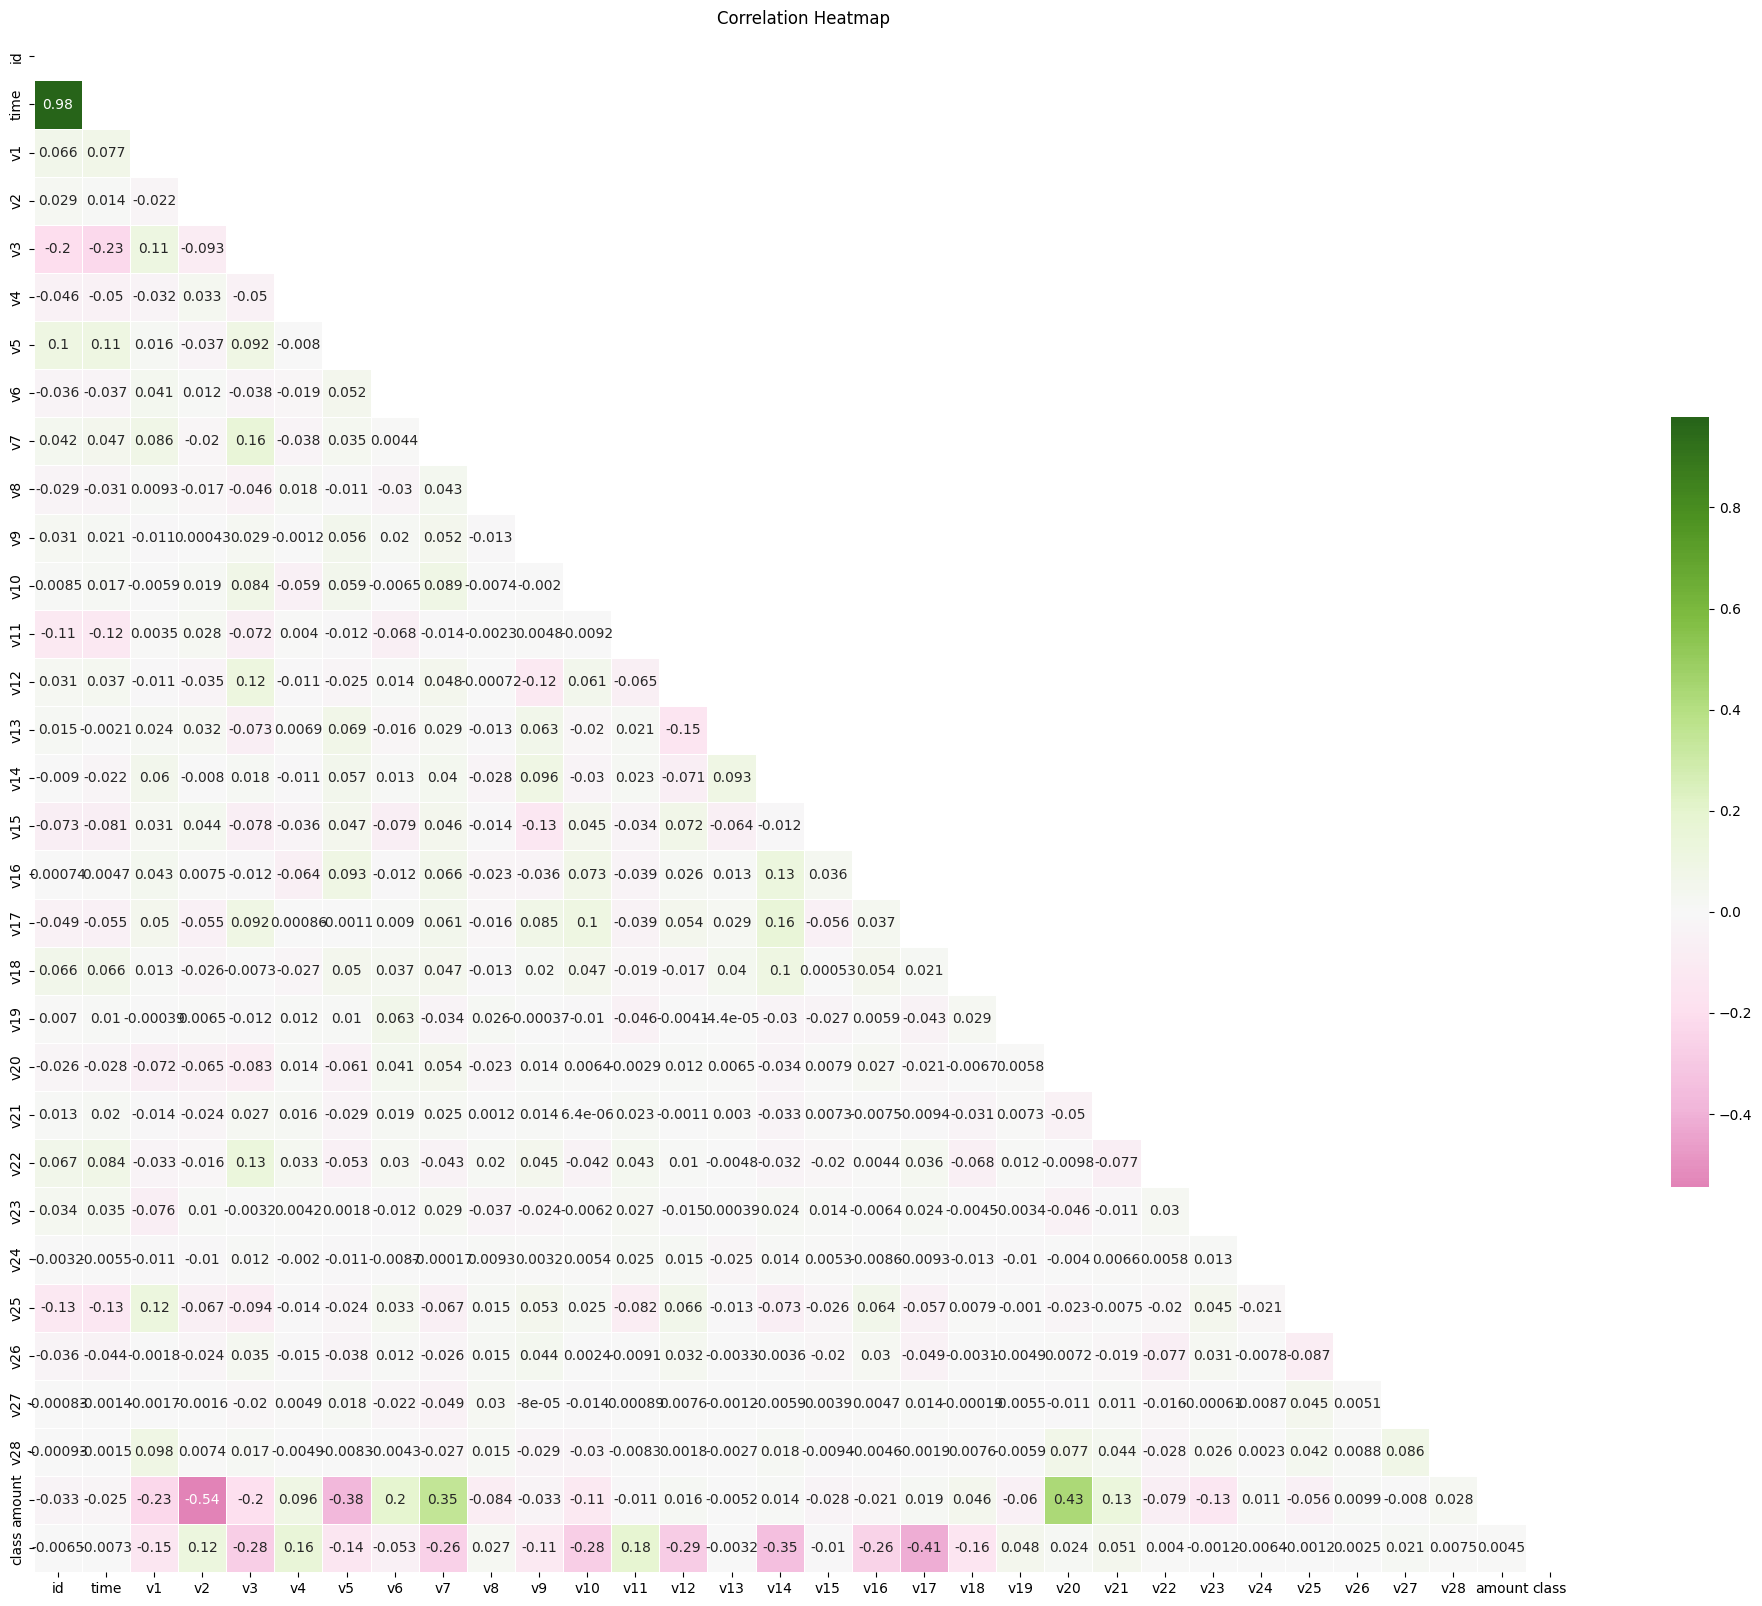

In [9]:
# heatmap to understand the correlation between the variables
plt.figure(figsize=(25, 20))
correlation_matrix = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True, cmap='PiYG', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

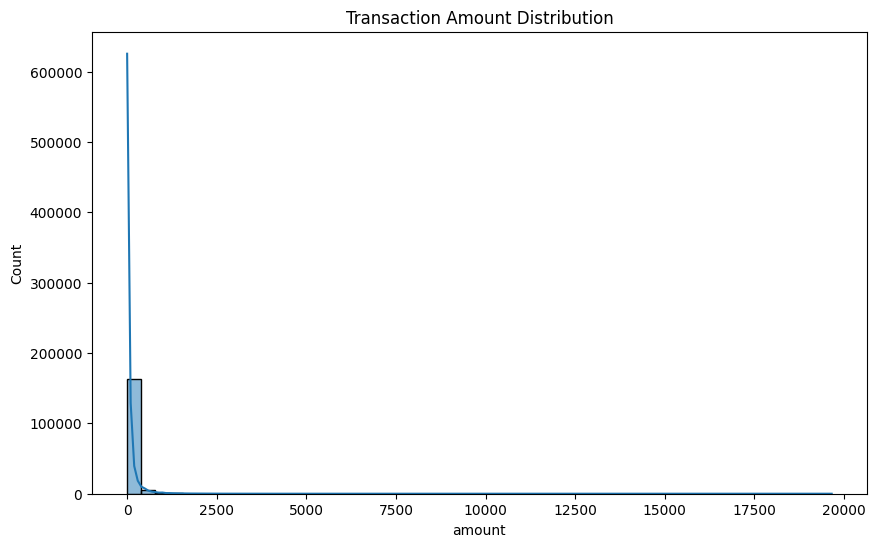

In [12]:
# Distribution of the transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(train['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

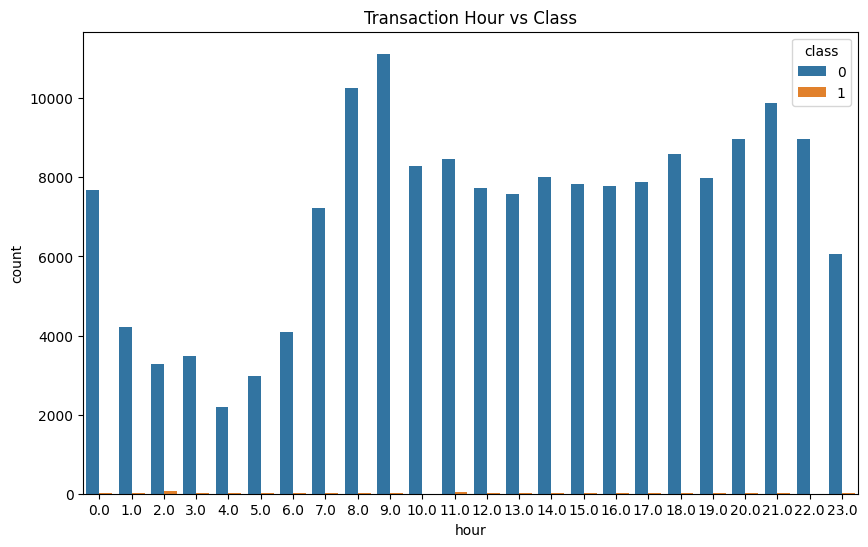

In [13]:
# creating a feature for transaction hour
sample = train.copy(deep=True)
sample['hour'] = sample['time'].apply(lambda x: divmod(x, 3600)[0] % 24)

# Visualizing the new 'hour' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='class', data=sample)
plt.title('Transaction Hour vs Class')
plt.show()

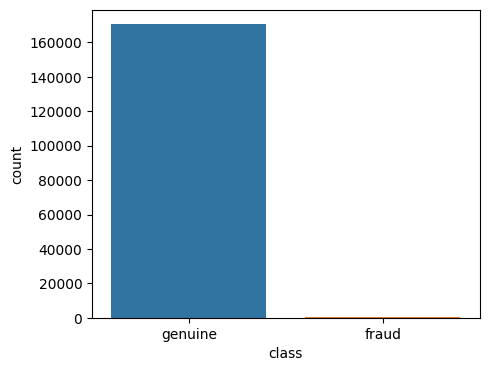

,class,count
0,genuine,170523
1,fraud,360


In [16]:
# exploring class distribution
class_df = train['class'].value_counts().reset_index()
class_df['class'] = class_df['class'].replace(1,"fraud")
class_df['class'] = class_df['class'].replace(0,"genuine")
fig, ax = plt.subplots(figsize=(5,4))
bars = sns.barplot(class_df,x="class",y="count",hue="class")
plt.show()

class_df

## Handling imbalance using SMOTE

In [15]:
# Separate features and target variable
X = train.drop('class', axis=1)
y = train['class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after resampling
print(pd.Series(y_resampled).value_counts())


isfraud
0    149731
1    149731
Name: count, dtype: int64


## Modeling

ROC AUC: 0.9999995324013247


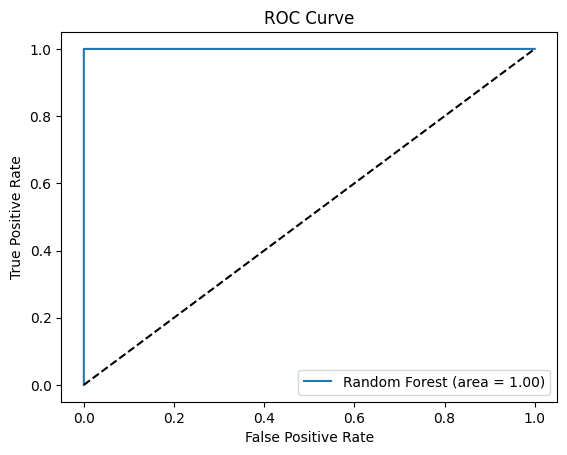

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

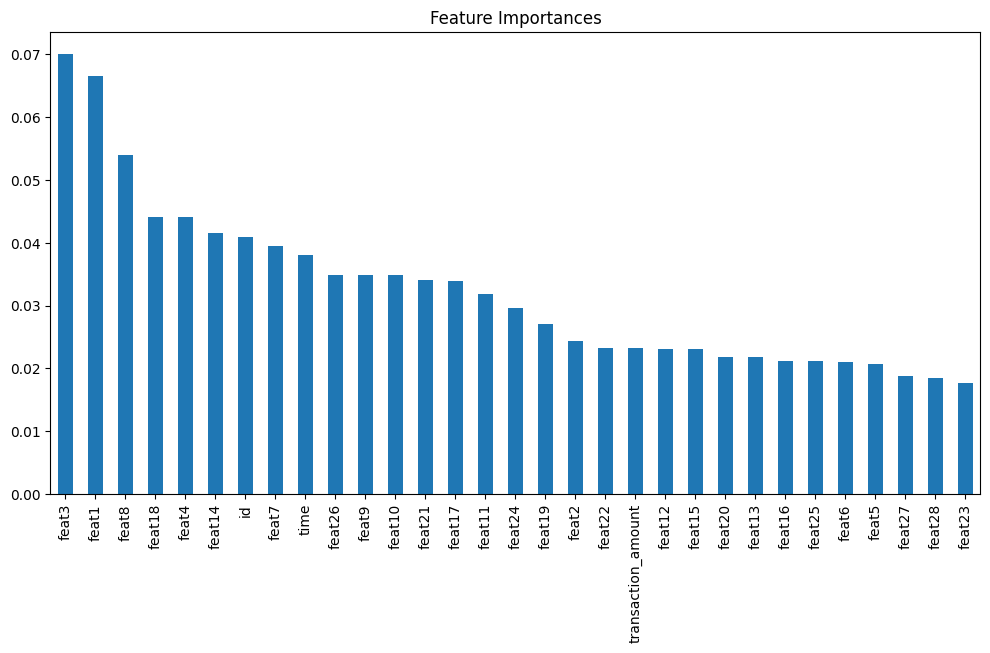

In [17]:
# Feature importance for Random Forest
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

### Find best model

In [19]:
# Define models and parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Grid Search for hyperparameter tuning
best_estimators = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], scoring='roc_auc', cv=5)
    grid.fit(X_train, y_train)
    best_estimators[model_name] = grid.best_estimator_
    print(f'{model_name} best parameters: {grid.best_params_}')
    print(f'{model_name} best ROC AUC: {grid.best_score_}')


Logistic Regression best parameters: {'C': 10}
Logistic Regression best ROC AUC: 0.8480528535202033
Decision Tree best parameters: {'max_depth': 15}
Decision Tree best ROC AUC: 0.9772873558333395
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 200}
Random Forest best ROC AUC: 0.9999799679862965
Gradient Boosting best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Gradient Boosting best ROC AUC: 0.9796005776027196


In [20]:
for model_name, model in best_estimators.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f'{model_name} ROC AUC on test set: {roc_auc}')

Logistic Regression ROC AUC on test set: 0.8476547785440036
Decision Tree ROC AUC on test set: 0.9785431798978779
Random Forest ROC AUC on test set: 0.9999906415836924
Gradient Boosting ROC AUC on test set: 0.9802298026203794


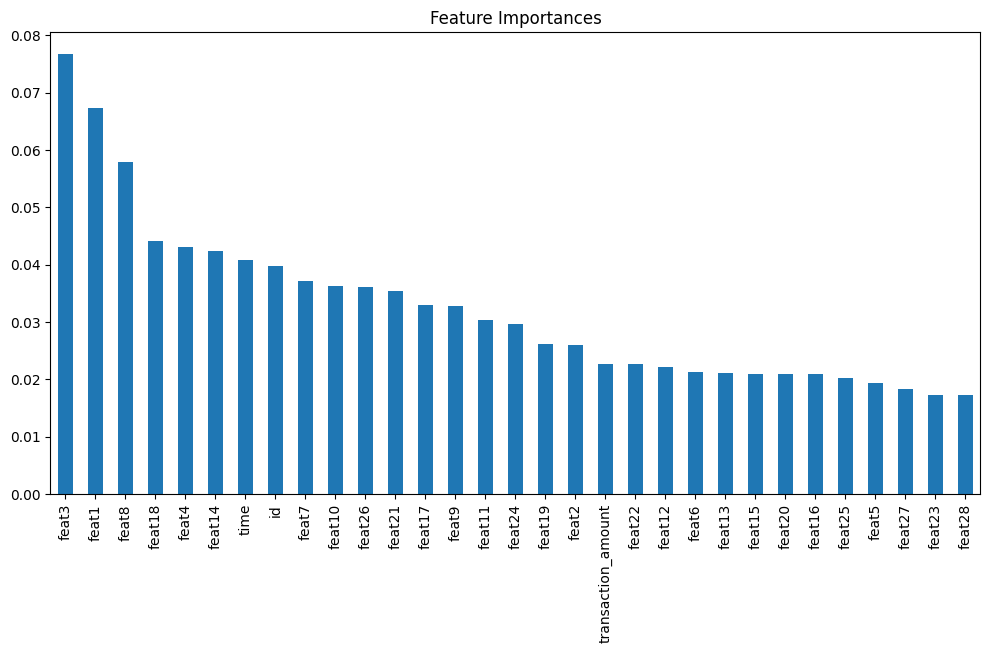

In [21]:
# Feature importance for Random Forest
feature_importances = pd.Series(best_estimators['Random Forest'].feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

### Exploring best model - Random Forest Classifier

Random Forest ROC AUC: 0.9999906415836924


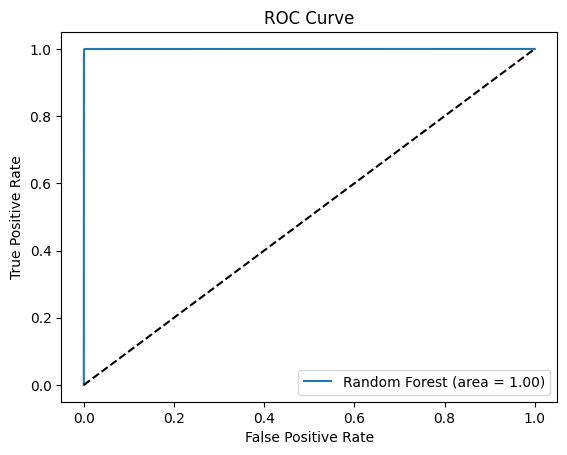

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44845
           1       1.00      1.00      1.00     44994

    accuracy                           1.00     89839
   macro avg       1.00      1.00      1.00     89839
weighted avg       1.00      1.00      1.00     89839



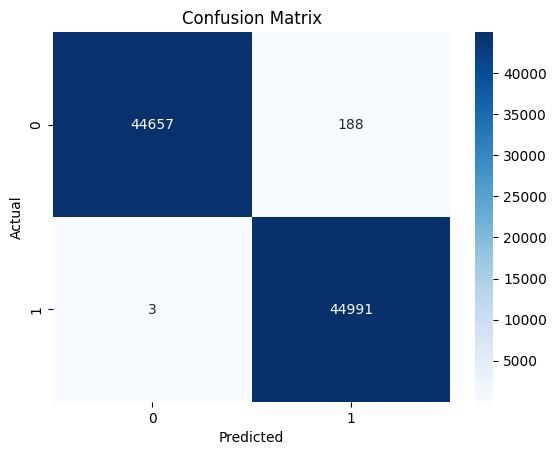

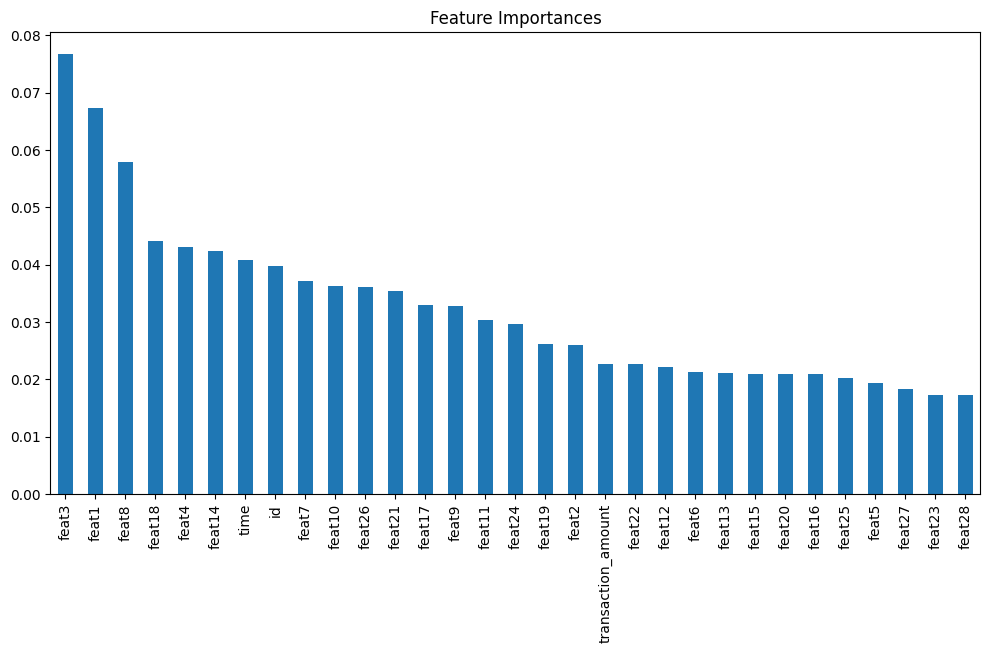

In [27]:
# Best parameters and estimator
best_rf = best_estimators['Random Forest']

# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Random Forest ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict the class labels using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

# # SHAP values for model interpretation
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")
# shap.summary_plot(shap_values[1], X_test)

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
# average_precision = average_precision_score(y_test, y_pred_prob)
# plt.step(recall, precision, where='post')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

### Second Iteration - Reducing Overfitting

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Cross-validated ROC AUC: 0.9939243303182586
Random Forest ROC AUC: 0.7153589767479955


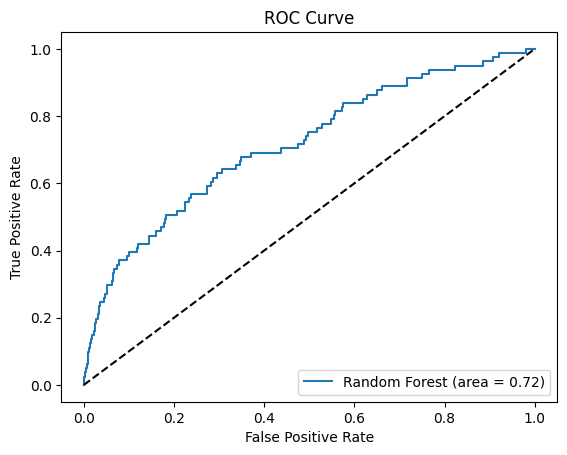

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     44919
           1       0.01      0.19      0.02        81

    accuracy                           0.97     45000
   macro avg       0.51      0.58      0.50     45000
weighted avg       1.00      0.97      0.98     45000



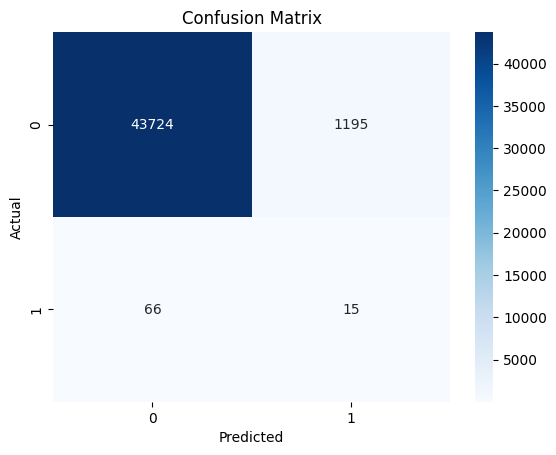

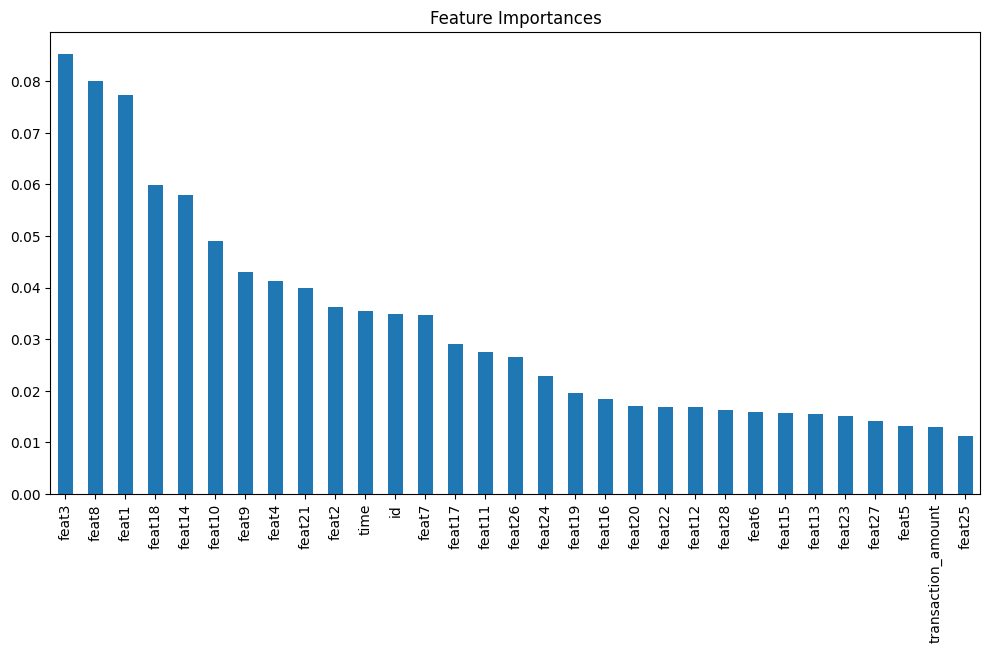

In [8]:
# Separate features and target variable
X = train.drop('class', axis=1)
y = train['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Random Forest model and parameter grid with more conservative settings
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],  # fewer trees to reduce complexity
    'max_depth': [5, 10],  # shallower trees
    'min_samples_split': [5, 10],  # larger minimum samples to split
    'min_samples_leaf': [4, 8]  # larger minimum samples per leaf
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate with cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print(f'Cross-validated ROC AUC: {cv_scores.mean()}')

# Predict probabilities
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Random Forest ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict the class labels using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

# # SHAP values for model interpretation
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")
# shap.summary_plot(shap_values[1], X_test)

# # Precision-Recall Curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
# average_precision = average_precision_score(y_test, y_pred_prob)
# plt.step(recall, precision, where='post')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
# plt.show()


## Prediction on Test

In [20]:
sample_submission = pd.read_csv(r"../data/sample_submission.csv")
sample_submission.head()

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0


In [9]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]

submission_prob = best_rf.predict_proba(test)[:, 1]
test['IsFraud'] = submission_prob.round(1)
submission = test[['id','IsFraud']]
submission.to_csv(r"../data/submission_with_smote.csv",index=False)

## Final Submission

In [17]:
train = pd.read_csv(r"../data/train.csv")
train.columns = [col.strip().lower() for col in train.columns]
print(f"The shape of the train data: {train.shape}")


X = train.drop('class', axis=1)
y = train['class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

The shape of the train data: (170883, 32)
class
0    170523
1    170523
Name: count, dtype: int64


In [19]:
# Random Forest model with previous found best parameters
rf = RandomForestClassifier(random_state=42, 
                            max_depth=10,
                            min_samples_leaf=4,
                            min_samples_split=10,
                            n_estimators=100)

rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [24]:
test = pd.read_csv(r"../data/test.csv")
test.columns = [col.strip().lower() for col in test.columns]

# Predict probabilities
submission_prob = rf.predict_proba(test)[:, 1]
test['Class'] = submission_prob.round(1)
submission = test[['id','Class']]
submission.to_csv(r"../data/submission_with_smote.csv",index=False)